In [1]:
import json
import pandas as pd


import util
import train_and_predict
import feature_importance

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
path = ''

### Process input files for training on trian (evaluate on validation) pipline

In [3]:
X_train_pgfams_to_train_and_val = util.create_x_df(['train_genomes.fasta'], ['validation_genomes.fasta'],
                 'train_genomes_pgfams_dict', 'train_pgfams_to_train_and_validation.json', min_num=10)

total pgfams: 353863
Creating features dictionary...
Creating features dictionary - Done
total pgfams in final dict: 16231
Creating features vectors..
Creating features vectors - Done


In [4]:
'''
In order to track the WSPC classifier creation and get the exact results for each step, 
use the file 'wspc_order_train_10minsize.json' (which was used in the creation of the WSPC classifer) for pgfams_order_in_vec. 
''' 
train_pgfams_desired_oreder = path +  'wspc_order_train_10minsize.json'
pgfams_from_train_to_val = util.pgfams_order_in_vec(X_train_pgfams_to_train_and_val ,train_pgfams_desired_oreder)

In [5]:
y_train = util.create_labels_df(path + 'train_genomes_information.csv')
y_validation = util.create_labels_df(path + 'validation_genomes_information.csv')

In [6]:
X_train = pgfams_from_train_to_val.loc[y_train.index]
X_valid = pgfams_from_train_to_val.loc[y_validation.index]

### Process input files for training on trian and validation (evaluate on test)  pipline

In [7]:
X_train_val_pgfams_to_train_val_test = util.create_x_df(['train_genomes.fasta', 'validation_genomes.fasta'],
        ['train_genomes.fasta',  'validation_genomes.fasta', 'test_genomes.fasta'],
                 'train_and_val_genomes_pgfams_dict', 'train_and_val_pgfams_to_train_val_test.json', min_num=10)

total pgfams: 391516
Creating features dictionary...
Creating features dictionary - Done
total pgfams in final dict: 17998
Creating features vectors..
Creating features vectors - Done


In [8]:
'''
In order to track the WSPC classifier creation and get the exact results for each step, 
use the file 'wspc_order_train_validation_10minsize.json' (which was used in the creation of the WSPC classifer) for pgfams_order_in_vec. 
''' 
train_val_pgfams_desired_oreder = path +  'wspc_order_train_validation_10minsize.json'
pgfams_from_train_and_val_to_test = util.pgfams_order_in_vec(X_train_val_pgfams_to_train_val_test ,train_val_pgfams_desired_oreder)

In [9]:
y_train_validation = y_train.append(y_validation)
y_test =  util.create_labels_df(path + 'test_genomes_information.csv')

In [10]:
X_train_valid = pgfams_from_train_and_val_to_test.loc[y_train_validation.index]
X_test = pgfams_from_train_and_val_to_test.loc[y_test.index]

## Optimizing the 'k' parameter for the first step of the feature selection (by chi2) 


In [11]:
best_k = train_and_predict.optimize_k(50, 500, 50, X_train, y_train, X_valid, y_validation)

________50________
false_positive: 7,total NHPs: 35
false_negative: 9,total HPs: 60
BAcc: 0.82
sensitivity: 0.85
specificity: 0.8
aupr_auc: 0.88
roc_auc: 0.86
________100________
false_positive: 6,total NHPs: 35
false_negative: 8,total HPs: 60
BAcc: 0.85
sensitivity: 0.87
specificity: 0.83
aupr_auc: 0.92
roc_auc: 0.89
________150________
false_positive: 7,total NHPs: 35
false_negative: 8,total HPs: 60
BAcc: 0.83
sensitivity: 0.87
specificity: 0.8
aupr_auc: 0.95
roc_auc: 0.92
________200________
false_positive: 6,total NHPs: 35
false_negative: 9,total HPs: 60
BAcc: 0.84
sensitivity: 0.85
specificity: 0.83
aupr_auc: 0.95
roc_auc: 0.92
________250________
false_positive: 6,total NHPs: 35
false_negative: 10,total HPs: 60
BAcc: 0.83
sensitivity: 0.83
specificity: 0.83
aupr_auc: 0.96
roc_auc: 0.92
________300________
false_positive: 6,total NHPs: 35
false_negative: 9,total HPs: 60
BAcc: 0.84
sensitivity: 0.85
specificity: 0.83
aupr_auc: 0.96
roc_auc: 0.93
________350________
false_positive: 

## Optimizing the 't' parameter for the second step of the feature selection (clusterig for removing of highly correlated features) 

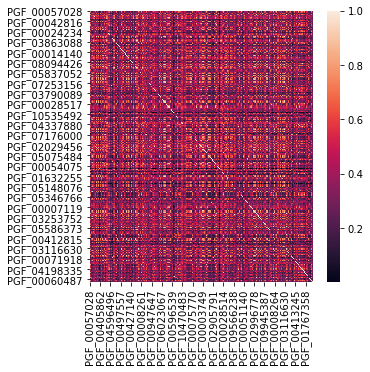

In [12]:
X_train_fs = train_and_predict.perform_fs_first_step(X_train, y_train.Label, best_k)
feature_corr_matrix_train = train_and_predict.heatmap_correlated_features(X_train_fs)

In [13]:
X_train_fs = train_and_predict.perform_fs_first_step(X_train, y_train.Label, best_k)
best_t = train_and_predict.optimize_t(0.2, 0.43, 0.03, X_train_fs, y_train, feature_corr_matrix_train, X_valid, y_validation)

---------------------0.2------------------
selected_features len: 268
false_positive: 6,total NHPs: 35
false_negative: 8,total HPs: 60
BAcc: 0.85
sensitivity: 0.87
specificity: 0.83
aupr_auc: 0.96
roc_auc: 0.93
---------------------0.23------------------
selected_features len: 240
false_positive: 5,total NHPs: 35
false_negative: 9,total HPs: 60
BAcc: 0.85
sensitivity: 0.85
specificity: 0.86
aupr_auc: 0.96
roc_auc: 0.93
---------------------0.26------------------
selected_features len: 222
false_positive: 5,total NHPs: 35
false_negative: 7,total HPs: 60
BAcc: 0.87
sensitivity: 0.88
specificity: 0.86
aupr_auc: 0.95
roc_auc: 0.92
---------------------0.29------------------
selected_features len: 198
false_positive: 4,total NHPs: 35
false_negative: 9,total HPs: 60
BAcc: 0.87
sensitivity: 0.85
specificity: 0.89
aupr_auc: 0.95
roc_auc: 0.91
---------------------0.32------------------
selected_features len: 177
false_positive: 5,total NHPs: 35
false_negative: 9,total HPs: 60
BAcc: 0.85
sensit

# Train model on the entire training data (train + validation) with the selected t and k values, and test the resulting model on the WSPC test

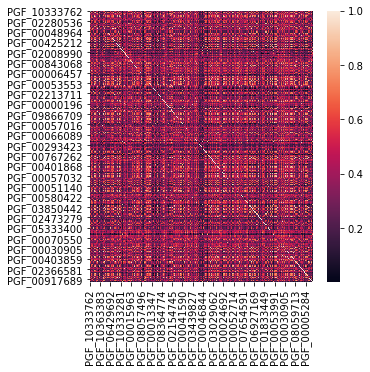

In [14]:
X_train_valid_fs = train_and_predict.perform_fs_first_step(X_train_valid, y_train_validation.Label, best_k)
feature_corr_matrix_train_val = train_and_predict.heatmap_correlated_features(X_train_valid_fs)

In [15]:
X_train_valid_clust = train_and_predict.perform_fs_second_step(X_train_valid_fs, feature_corr_matrix_train_val, best_t, y_train_validation)
final_model, evaluation_results = train_and_predict.train_and_predict(X_train_valid_clust, y_train_validation.Label, X_test, y_test.Label, random_state=0)

selected_features len: 238
false_positive: 11,total NHPs: 80
false_negative: 2,total HPs: 88
BAcc: 0.92
sensitivity: 0.98
specificity: 0.86
aupr_auc: 0.98
roc_auc: 0.98


In [16]:
util.save_model('wspc_classifier', final_model, X_train_valid_clust)

### Find top HP features

In [18]:
class_features = feature_importance.get_top_features_per_class_in_multiple_runs(X_train_valid_clust, y_train_validation, feature_importance.feature_importance)
print('TOP HP features in the final WSPC model: ')
for c,fet in enumerate(class_features['HP'][:15]):
    print(f'#{c+1} {fet}')

TOP HP features in the final WSPC model: 
#1 PGF_07157721
#2 PGF_00022550
#3 PGF_00405499
#4 PGF_06594013
#5 PGF_06757295
#6 PGF_07941512
#7 PGF_00006461
#8 PGF_00037937
#9 PGF_03081665
#10 PGF_02905791
#11 PGF_08199696
#12 PGF_01147190
#13 PGF_07854425
#14 PGF_01761390
#15 PGF_09847065
